In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#Read the transition matrices of agents in the same experiment
dim = 2**4
time = 500
mats = []
for i in range(4):
    with open("data/matrix_evol_{0:d}_0005.dat".format(i), "r") as mfile:
        for line in mfile:
            v = list(map(float,line.split()))
            assert len(v)-1 == dim**2
            if v[0] == time:
                mats.append(np.array(v[1:]).reshape(dim,dim))   
#print(mats)

In [61]:
av_mat = np.zeros((dim,dim))
for i in range(4):
    av_mat += mats[i]
av_mat /= 4
#print(av_mat)

In [62]:
var_mat = np.zeros((dim,dim))
for i in range(4):
    var_mat += (mats[i]-av_mat)**2
var_mat /= (4-1)
std_mat = np.sqrt(var_mat)
#print(std_mat)

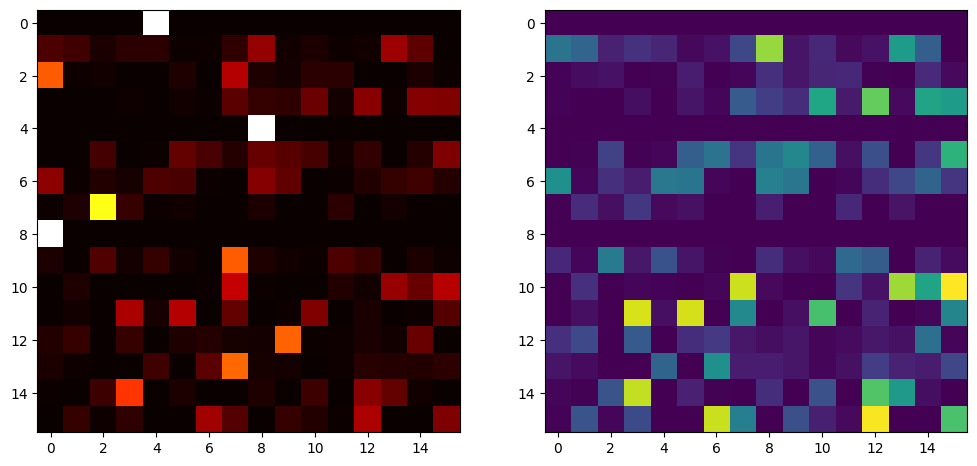

In [63]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(av_mat, cmap='hot', vmin=0, vmax=1)
fig.add_subplot(1,2,2)
plt.imshow(std_mat)